# Content List

## 1. Import libraries

## 2. Import data

## 3. Wrangling data
### 3.1 Create pivot table
### 3.2 Check for missing values

## 4. The Elbow Technique

## 5. K-means clustering

## 6. Visualizations

## 7. Connecting Clusters to Demographics

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# 2. Import data

In [2]:
# Create path to folder project 

path = r'C:\Users\adrig\OneDrive\Documentos\CAREERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 6\Internet use in EU'
path

'C:\\Users\\adrig\\OneDrive\\Documentos\\CAREERFOUNDRY\\DATA IMMERSION\\ACHIEVEMENT 6\\Internet use in EU'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'internet_use_act_pp_gdp_act_group_demo_cat.csv'), index_col = 0)

In [4]:
df.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group,demographic_group_category
0,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,Internet banking,66.65,40200.0,E-commerce and Services,Other
1,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,civic or political participation,21.21,40200.0,Civic,Other
2,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,sending/receiving e-mails,72.86,40200.0,Personal Communication,Other
3,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,finding information about goods and services,66.88,40200.0,Information and Research,Other
4,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,job search or sending an application,14.11,40200.0,Work and Professional Use,Other


In [5]:
df.shape

(1006934, 10)

# 3. Wrangling data

In [6]:
# delete demographic category: Other
df_reduced = df[df['demographic_group_category'] != 'Other']

In [7]:
df_reduced['demographic_group_category'].value_counts()

demographic_group_category
Gender & Education level    170523
Gender & Age                145819
Area of Residence            77406
Employment Status            67113
Income quartiles             66089
Special interests            63495
Household status             22777
Name: count, dtype: int64

## 3.1 Create pivot table

In [8]:
# Pivot table for internet activities
df_pivot = df_reduced.pivot_table(index = ['country', 'year','demographic_group'], columns = 'activity_group', values ='internet_activities_rate', aggfunc='mean')

In [9]:
df_pivot.shape

(16054, 9)

In [10]:
df_pivot.head()

activity_group                            Civic  E-commerce and Services  \
country year demographic_group                                             
Albania 2018 Employees working full time    NaN                    2.180   
             Employees working part time    NaN                    1.875   
             Females 35 to 44 years old     NaN                    1.380   
             Females 45 to 54 years old     NaN                    1.015   
             Females 55 to 64 years old     NaN                    0.545   

activity_group                            Health  Information and Research  \
country year demographic_group                                               
Albania 2018 Employees working full time    4.22                     33.11   
             Employees working part time    2.48                     28.14   
             Females 35 to 44 years old     2.32                     23.86   
             Females 45 to 54 years old     2.44                     18.94   
             Females 55 to 64 years old     2.12                     11.73   

activity_group                            Learning and Education  \
country year demographic_group                                     
Albania 2018 Employees working full time                     NaN   
             Employees working part time                     NaN   
             Females 35 to 44 years old                      NaN   
             Females 45 to 54 years old                      NaN   
             Females 55 to 64 years old                      NaN   

activity_group                            Media and Entertainment  \
country year demographic_group                                      
Albania 2018 Employees working full time                    28.31   
             Employees working part time                    25.87   
             Females 35 to 44 years old                     18.99   
             Females 45 to 54 years old                     10.13   
             Females 55 to 64 years old                      6.77   

activity_group                            Personal Communication  \
country year demographic_group                                     
Albania 2018 Employees working full time                   43.92   
             Employees working part time                   38.05   
             Females 35 to 44 years old                    35.86   
             Females 45 to 54 years old                    25.08   
             Females 55 to 64 years old                    20.70   

activity_group                            Social Media  \
country year demographic_group                           
Albania 2018 Employees working full time         56.12   
             Employees working part time         55.80   
             Females 35 to 44 years old          43.91   
             Females 45 to 54 years old          27.89   
             Females 55 to 64 years old          18.74   

activity_group                            Work and Professional Use  
country year demographic_group                                       
Albania 2018 Employees working full time                        NaN  
             Employees working part time                        NaN  
             Females 35 to 44 years old                         NaN  
             Females 45 to 54 years old                         NaN  
             Females 55 to 64 years old                         NaN

In [11]:
df_pivot.dtypes

activity_group
Civic                        float64
E-commerce and Services      float64
Health                       float64
Information and Research     float64
Learning and Education       float64
Media and Entertainment      float64
Personal Communication       float64
Social Media                 float64
Work and Professional Use    float64
dtype: object

## 3.2 Check for missing values

In [12]:
df_pivot.isnull().sum()

activity_group
Civic                        8334
E-commerce and Services         0
Health                       9832
Information and Research        0
Learning and Education       4052
Media and Entertainment      4540
Personal Communication         14
Social Media                 1790
Work and Professional Use    4416
dtype: int64

In [13]:
df_pivot = df_pivot.fillna(0)

In [14]:
df_pivot.isnull().sum()

activity_group
Civic                        0
E-commerce and Services      0
Health                       0
Information and Research     0
Learning and Education       0
Media and Entertainment      0
Personal Communication       0
Social Media                 0
Work and Professional Use    0
dtype: int64

# 4. The Elbow Technique

In [15]:
num_cl = range(1,10) # range of potential clusters in the data
kmeans =[KMeans(n_clusters=i) for i in num_cl] # defines kmeans clusters in the range assigned above

In [16]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_pivot).score(df_pivot) for i in range (len(kmeans))]
score

C:\Users\adrig\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\adrig\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\adrig\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\adrig\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

[-61164027.713278815,
 -38017717.75656259,
 -26424431.67395068,
 -21603895.44122481,
 -19102450.729598437,
 -17167136.605651222,
 -15926000.981919464,
 -14806290.084268438,
 -14252317.236641448]

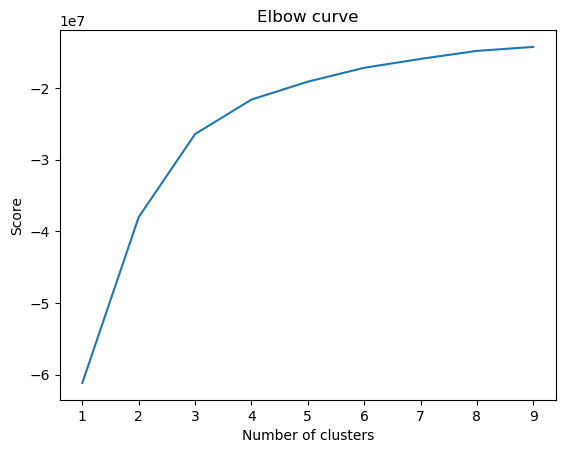

In [17]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

In three the curve starts to straighten out, but it is until 5 that the straighten is more dramatic, so I will try with 4 clusters. 

# 5. K-means clustering

In [18]:
# Create the k-means object
kmeans = KMeans(n_clusters=4)

In [19]:
# Fit the k-means object to the data
kmeans.fit(df_pivot)

KMeans(n_clusters=4)

In [20]:
df_pivot['clusters'] = kmeans.fit_predict(df_pivot)

In [21]:
df_pivot.head()

activity_group                            Civic  E-commerce and Services  \
country year demographic_group                                             
Albania 2018 Employees working full time    0.0                    2.180   
             Employees working part time    0.0                    1.875   
             Females 35 to 44 years old     0.0                    1.380   
             Females 45 to 54 years old     0.0                    1.015   
             Females 55 to 64 years old     0.0                    0.545   

activity_group                            Health  Information and Research  \
country year demographic_group                                               
Albania 2018 Employees working full time    4.22                     33.11   
             Employees working part time    2.48                     28.14   
             Females 35 to 44 years old     2.32                     23.86   
             Females 45 to 54 years old     2.44                     18.94   
             Females 55 to 64 years old     2.12                     11.73   

activity_group                            Learning and Education  \
country year demographic_group                                     
Albania 2018 Employees working full time                     0.0   
             Employees working part time                     0.0   
             Females 35 to 44 years old                      0.0   
             Females 45 to 54 years old                      0.0   
             Females 55 to 64 years old                      0.0   

activity_group                            Media and Entertainment  \
country year demographic_group                                      
Albania 2018 Employees working full time                    28.31   
             Employees working part time                    25.87   
             Females 35 to 44 years old                     18.99   
             Females 45 to 54 years old                     10.13   
             Females 55 to 64 years old                      6.77   

activity_group                            Personal Communication  \
country year demographic_group                                     
Albania 2018 Employees working full time                   43.92   
             Employees working part time                   38.05   
             Females 35 to 44 years old                    35.86   
             Females 45 to 54 years old                    25.08   
             Females 55 to 64 years old                    20.70   

activity_group                            Social Media  \
country year demographic_group                           
Albania 2018 Employees working full time         56.12   
             Employees working part time         55.80   
             Females 35 to 44 years old          43.91   
             Females 45 to 54 years old          27.89   
             Females 55 to 64 years old          18.74   

activity_group                            Work and Professional Use  clusters  
country year demographic_group                                                 
Albania 2018 Employees working full time                        0.0         0  
             Employees working part time                        0.0         0  
             Females 35 to 44 years old                         0.0         0  
             Females 45 to 54 years old                         0.0         0  
             Females 55 to 64 years old                         0.0         0

In [22]:
df_pivot['clusters'].value_counts()

clusters
0    4452
3    4432
2    3604
1    3566
Name: count, dtype: int64

# 6. Visualizations

In [23]:
# create cluster profiles 
cluster_profiles = df_pivot.groupby('clusters').mean().reset_index()
cluster_profiles.head()

activity_group,clusters,Civic,E-commerce and Services,Health,Information and Research,Learning and Education,Media and Entertainment,Personal Communication,Social Media,Work and Professional Use
0,0,2.732403,13.725007,0.799602,32.845279,2.830638,13.774483,34.854528,20.268992,7.763228
1,1,10.988003,49.121485,27.733015,84.596378,15.834347,80.364134,78.522938,73.193867,4.049177
2,2,20.964678,45.929301,0.027736,78.705577,17.253517,1.655178,75.500616,67.906224,20.691189
3,3,3.467505,34.437860,5.310573,64.775006,5.394260,42.669390,59.063359,40.224836,12.472904


In [24]:
# Change table format
df_melted = cluster_profiles.melt(id_vars='clusters', var_name='Activity_group', value_name='Internet_usage_rate')
df_melted.head()

,clusters,Activity_group,Internet_usage_rate
0,0,Civic,2.732403
1,1,Civic,10.988003
2,2,Civic,20.964678
3,3,Civic,3.467505
4,0,E-commerce and Services,13.725007


In [30]:
df_melted.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))

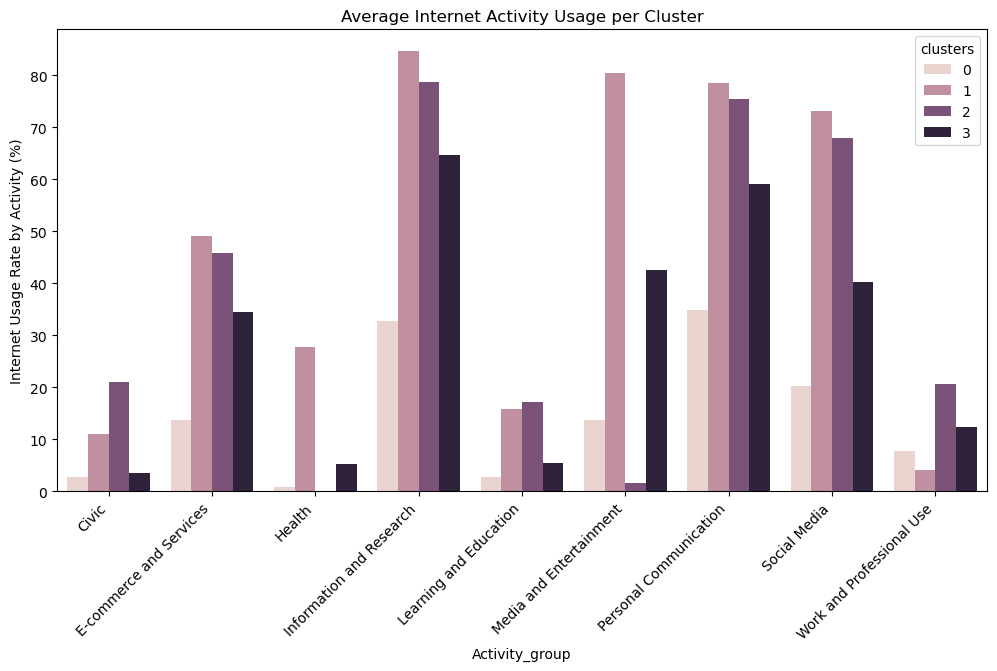

In [25]:
# Bar plot

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x='Activity_group', y='Internet_usage_rate', hue='clusters')
plt.title ('Average Internet Activity Usage per Cluster')
plt.xticks(rotation=45, ha='right' )
plt.ylabel('Internet Usage Rate by Activity (%)')
plt.show()

- CLuster 0 - Lowest rates among all clusters. Highest rates (around 30%) in Personal Communication and Information and Research. Followed by Social Media, Media and Entertainment, E-commerce and Services, Work and Professional Use, Learning and Education, Civic participation. Health-related activities, almost null. **Profile: Focused on Communication and Information but with very low internet usage**

- Cluster 1 - Highest rates in Information and Research (more than 80%) followed by Media and Entertainment, Personal Communication and Social Media (rates above 70%). Moderate use of internet for E-commerce and Services and Health-related activities (the highest rates among clusters). Low rates in Learning and Education, Civic participation and Professional Use. **Profile: More diverse group with high rates of internet use, focused on communication and entertainment**

- Cluster 2 - High rates in Information and Research, Personal Communication and Social Media (above 70%). Moderate rates in E-Commerce and Services (50%). Low rates (less than 20%) in Learning and Education, Work and Professional Use and Civic(but the highest rates across all clusters). Media and Entertainment almost null rates, and null rates for Health related activities. **Profile: Focused on Communication and Information.**

  - Cluster 3- Moderate use overall. Highest rate (60%) in Information and Research, Personal Communication. Social Media, E-commerce and Services and Media and Entertainment show rates around 30%. Lowest rates in Work and Professional Use, Learning and Education, Health and Civic activities. **Profile: Moderate users, mainly for communication and information**

## 7. Connecting clusters to Demographics 

In [26]:
df_pivot = df_pivot.reset_index()

In [27]:
# Which demographic groups are in each cluster (top 10)
df_pivot.groupby('clusters')['demographic_group'].value_counts().groupby(level=0).head(10)

clusters  demographic_group                                             
0         Females with low formal education                                 489
          Males with low formal education                                   420
          Unemployed                                                        303
          Individuals living in rural areas                                 276
          Females with medium formal education                              275
          Individual living in a household with income in first quartile    238
          Males with medium formal education                                209
          Females 65 to 74 years old                                        207
          Males 65 to 74 years old                                          198
          Individuals living in towns and suburbs                           194
1         ICT professionals                                                 275
          Students                             

In [28]:
# Finding overrepresented groups in each cluster 

# Clusters size
cluster_size = df_pivot['clusters'].value_counts()

# Demographic group size
demo_size = df_pivot['demographic_group'].value_counts()

# Demographic group proportion in each cluster
cluster_demo_size = (df_pivot.groupby(['clusters', 'demographic_group']).size().div(cluster_size, level=0))

# Global proportion
global_demo = demo_size / len(df_pivot)

# Cluster proportion / global proportion
overrep = cluster_demo_size.div(global_demo, level='demographic_group')

# top 5 overrepresented groups in each cluster

top_overrep = overrep.groupby('clusters').nlargest(5)
top_overrep

clusters  clusters  demographic_group                                              
0         0         Retired Individuals                                                3.606020
                    Females 65 to 74 years old                                         2.637619
                    Females with low formal education                                  2.593152
                    Males 65 to 74 years old                                           2.522940
                    Individual living in a household with income in first quartile     2.397298
1         1         ICT professionals                                                  2.288429
                    Males, 25 to 34 years old                                          2.052132
                    Females, 25 to 34 years old                                        1.988500
                    Employees working full time                                        1.965923
                    Females 35 to 44 years old      